<a href="https://colab.research.google.com/github/jjy99927s/clvestimation/blob/main/clvmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving customer_lifetime_value(1).csv to customer_lifetime_value(1).csv
Dataset Loaded Successfully
   purchase_frequency_monthly  avg_order_value_usd  tenure_months  \
0                    6.346900            36.044615            7.0   
1                    6.358145           229.769785           50.0   
2                    6.857077            89.559834           69.0   
3                    6.380132           376.828366           64.0   
4                    3.182560           125.507991           39.0   

  customer_segment product_category_preference channel_preference  \
0              New         Multiple Categories              Store   
1              VIP             Single Category              Store   
2              NaN             Single Category             Online   
3          Churned             Single Category              Store   
4              New         Multiple Categories               Both   

  promotion_sensitivity  service_interactions  referral_count  \
0    

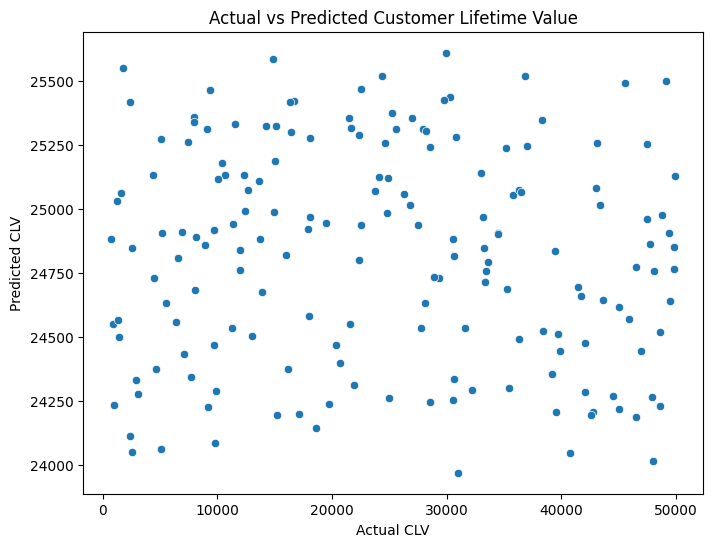


Feature Importance:
                      Feature  Coefficient
0  purchase_frequency_monthly  -190.066706
1         avg_order_value_usd     0.660718


In [3]:

# CUSTOMER LIFETIME VALUE PREDICTION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()

# 1. Load Dataset

file_path = "customer_lifetime_value(1).csv"
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully")
print(df.head())

# 2. Select Required Columns
df = df[[
    "purchase_frequency_monthly",
    "avg_order_value_usd",
    "clv_usd"
]]

# Remove rows where CLV is missing
df = df.dropna()

# 3. Features & Target

X = df[["purchase_frequency_monthly", "avg_order_value_usd"]]
y = df["clv_usd"]

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Train Model

model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predictions

y_pred = model.predict(X_test)


# 7. Model Evaluation

print("\nModel Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# 8. Visualization

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted Customer Lifetime Value")
plt.show()

# 9. Feature Importance

importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\nFeature Importance:")
print(importance)
